출처 :<br>
https://www.youtube.com/watch?v=8DjIJc7xH5U 10분 딥러닝 <br>
https://medium.com/@akarshzingade/logo-detection-using-yolov2-8cda5a68740e AKarsh Zingade - Logo detection using YOLOv2<br>


<h1> YOLO : You Only Look Once </h1>
- 한번에 보고 바로 처리하겠다는 신경망이다.

------
<H3>객체검출 관련 모델의 발전 </H3>

1. 머신러닝에서의 물체 인식 (Object Detection) <BR>
    - 특정 이미지에서 테두리 상자(Bounding Box)를 통해 영역을 설정<br>
    - 해당 영역 내 물체의 존재 유무 또는 물체의 종류를 판별하는 것을 목표로 하는 과제 <br>
2. 인공신경망을 활요한 모델의 발전
    

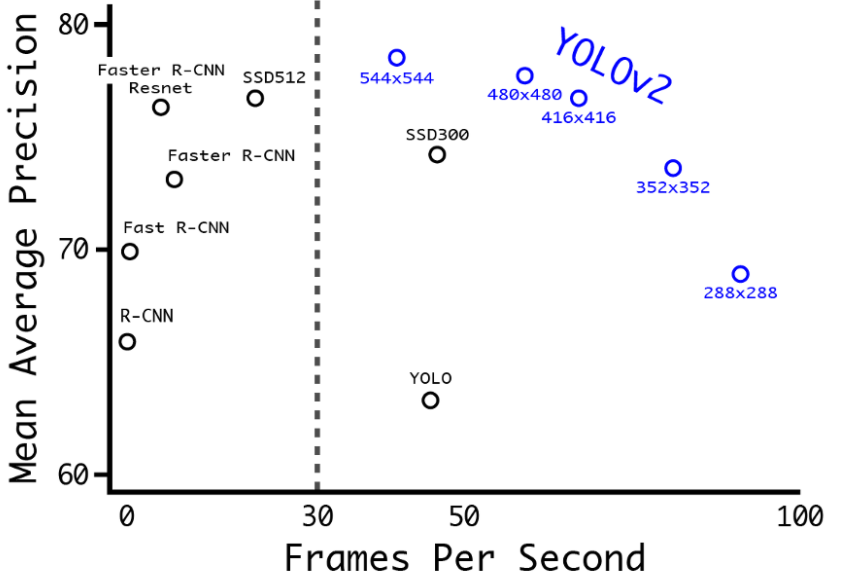

MAP : 정확성   / FPS : 속도

물체인식 과제가 자율주행자동차 등으로 활용되어 정확도 뿐만 아니라 신속성도 중요해지고 있다. <BR>
    30 기준으로 R-CNN계열의 모델들은 정확성은 있으나 실제 적용하기에 <b>신속성이 떨어진다</b> <br>
    따라서 최근에는 일정한 수준의 정확성을 유지하면서 물체인식의 속도를 높이는 여러 신경망이 개발됨

<h3>YOLO 모델</h3>
정의 : <br>
- 물체 인식을 수행하기 위해 고안된 심층 신경망 <br>
- 테두리상자 조정(Bounding Box Coordinate)과 분류(Classification)를 동일 신경망 구조를 통해 동시에 실행하는 통합인식(Unified Detection)을 구현<br><br>

절차 및 구조 : 

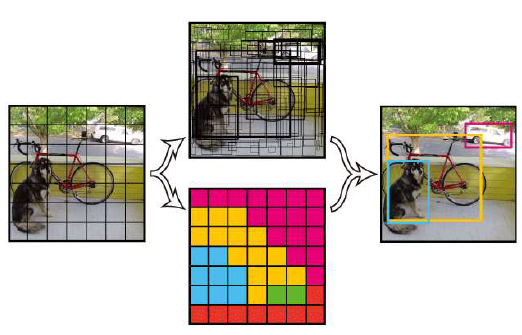

1. 이미지를 nxn개 그리드(Grid)로 분할<br>
2. 이미지 전체를 신경망에 넣고 특징 추출을 통해 <b>예측 텐서(Prediction Tensor)</b> 생성<br>
<p style="color:red;">예측 텐서 - 그리드 별 테두리상자 정보, 신뢰 점수, 분류 클래스 확률을 포함 </p>
3. 그리드 별 예측 정보를 바탕으로 테두리 상자 조정 및 분류 작업을 수행<br><br>

모델 살펴보기


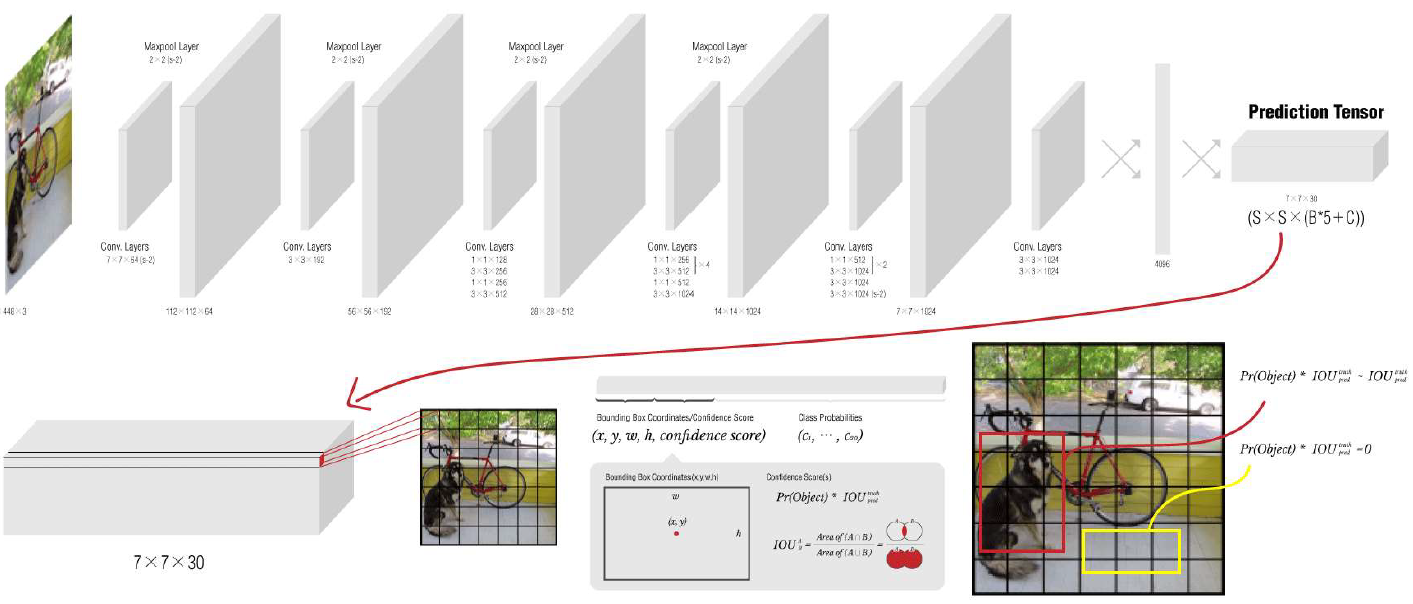

input data가 들어가고 CNN을 통과함 → fully connected layer → 예측 텐서를 뽑음 → 이것을 바탕으로 가중치 조정을 한다.<br>

Prediction Tensor : <Br> 
7 x 7 x 30 <br> 
7 x 7 은 grid 의 숫자를 의미 <br>
30은 Bx5+C <br>
    (B: 각각의 grid가 갖는 Bounding box의 후보를 말한다.)<br>
    (여기서는 grid 별로 bounding box를 2개를 선정을 하겠다는 것을 의미 (B=2)) <BR>
    (C: 클래스의 갯수 (여기서는 20) ) <BR>
    2x5+20 = 30 <BR>

30을 자세히 보자면 <BR>
    20개의 클래스와 bounding box가 2개이기 때문에 각각 1개의 bounding box에 대하여 5라는 길이의 벡터를 가지게 된다. <br>
    x,y 는 bounding box의 중앙점  / w,h 너비와 높이 / <bR>
    
<b>confidence score</b><br>
    
confidence score : 물체가 있는지? 있다면 이 box에 어느정도 포함되어 있는지? (신뢰도)<br>
Pr(Object) : 물체가 있을 확률  * IOU(Intersection over union): 정답과 예측한 것의 '교집합/합집합' <br><br>
    
노란 부분은 Pr값이 0이기 때문에 값이 0으로 나옴  <br>
모델을 가지고 학습을 하면 Pr값이 1이 되는 것을 목표로 하기 때문에 1*IOU 라서 IOU 만 남게된다. <BR>
즉, IOU를 가지고 계산을 한다 (가장 높은 Bounding box만 남겨서 최종 선정을 하겠다) - 역할

1개의 bounding box에 2개 후보군의 박스 5개의 벡터값을 가지고 있고(5*2), 20개의 클래스별로 확률값을 가지게 된다. 

<h3> YOLO 모델의 비용 함수</h3>


YOLO는 INPUT_DATA -> CNN -> FC -> PT(예측 텐서) 이 순으로 가고 <Br>
PT(예측 텐서)을 가지고 값을 조정해서 학습을 한다.<BR>
값을 조정하는 것을 cost function을 가지고 한다.(Multi loss) <br>
PT = ( ( x, y, w, h, s ) X B(각 그리드별 bounding box의 갯수) + C(클래스의 갯수)<br>

Multi loss = Coordinate Loss(x,y,w,h) + Confidence-Score Loss(s) + No-Object Penalties(오브젝트가 없을 때 페널티를 주는 텀) + Classification Loss

람다 coord(코디네이트), noobj(논 오브젝트) : <br>
테두리 상자의 변수에 대한 값을 더 반영하고 물체가 없는 영역에 대한 값을 덜 반영하기 위한 하이퍼 파라미터<br>
테두리 상자가 있는 영역에는 loss를 많이 주고 물체가 없는 영역에는 loss를 반영하지 않겠다는 것이 하이퍼 파라미터의 역할 <br>

1 i = i번째 물체가 있으면 1을 내보내고 아니면 0을 내보셈 <br>
1 ij = i번째 물체가 있는 것 뿐만 아니라, bounding box가 두개라면 첫번재와 두번째의 예측기 값이 i번째 셀의 다른 것보다 높으면 1을 내보냄 아니면 0<br>
No-Object Penalties 에서는 1ij가 들어가지면 물체가 있음이 아니라 없음으로 해석하는 것이 옳다. 높다가 아니라 낮다 </br>

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0-rc0'